Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1253 non-null   object 
 1   Time               1253 non-null   object 
 2   Latitude           1253 non-null   float64
 3   Longitude          1253 non-null   float64
 4   Magnitude          1253 non-null   float64
 5   Epicenter          1253 non-null   object 
 6   Datetime           1253 non-null   object 
 7   Inferred_District  1191 non-null   object 
dtypes: float64(3), object(5)
memory usage: 78.4+ KB
None

Missing Values:
Datetime              0
Inferred_District    62
dtype: int64

Missing Values After Imputation:
0


C:\Users\samss\AppData\Local\Temp\ipykernel_17360\2627727183.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Inferred_District'].fillna('Unknown', inplace=True)


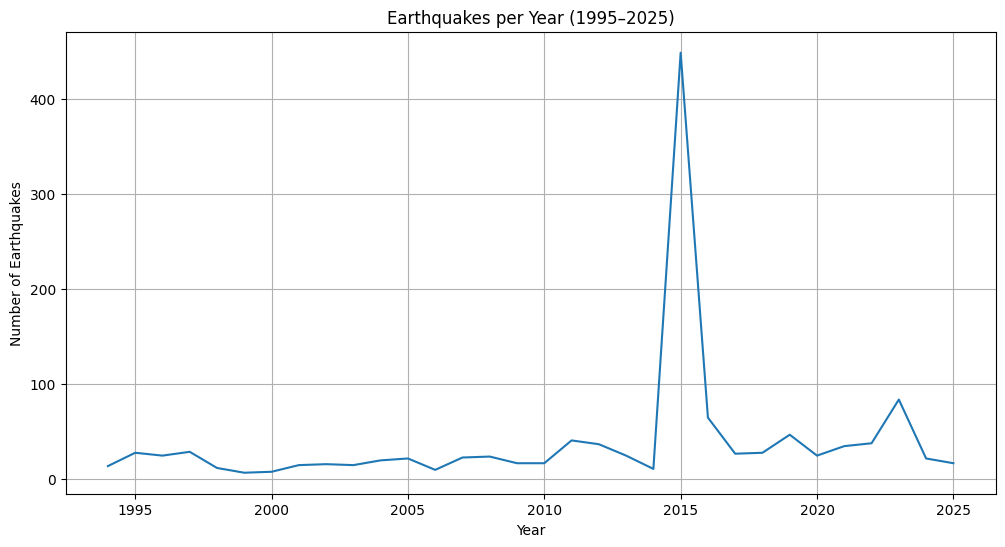

C:\Users\samss\AppData\Local\Temp\ipykernel_17360\2627727183.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')


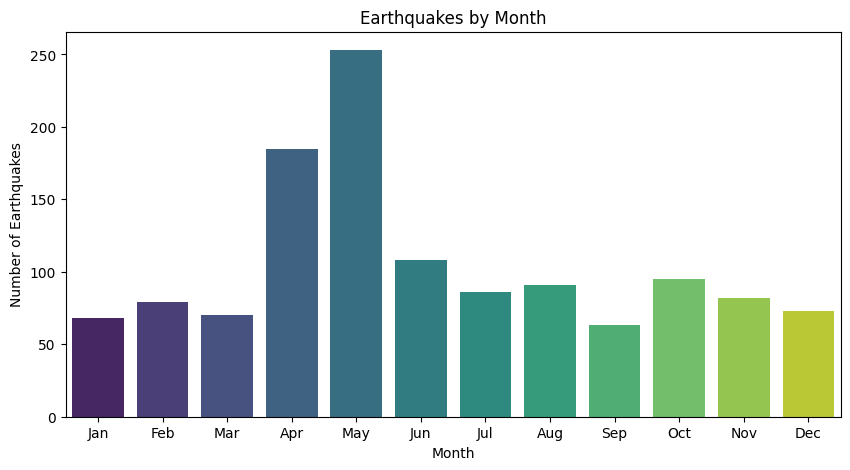

C:\Users\samss\AppData\Local\Temp\ipykernel_17360\2627727183.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=district_counts.values, y=district_counts.index, palette='magma')


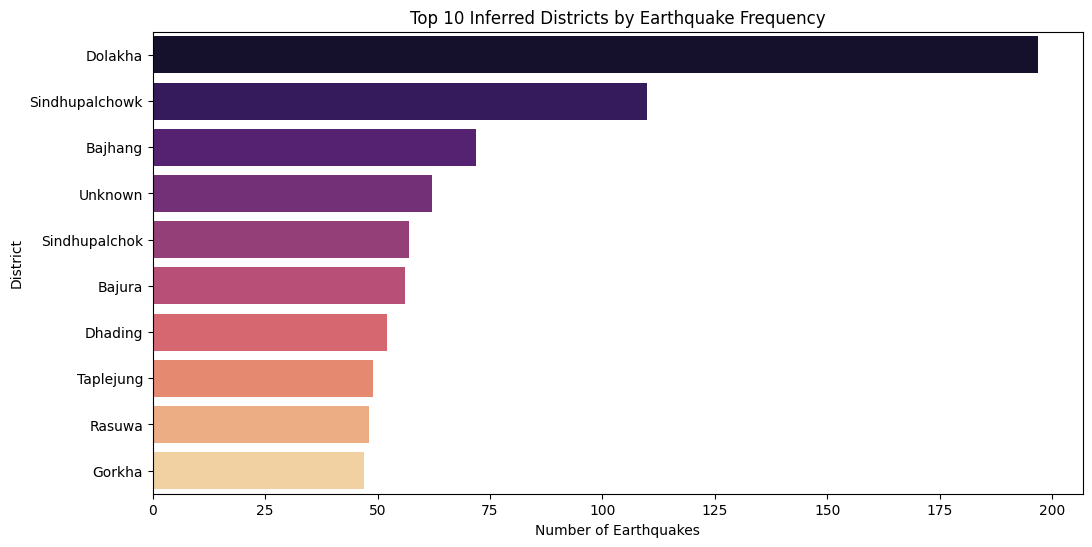

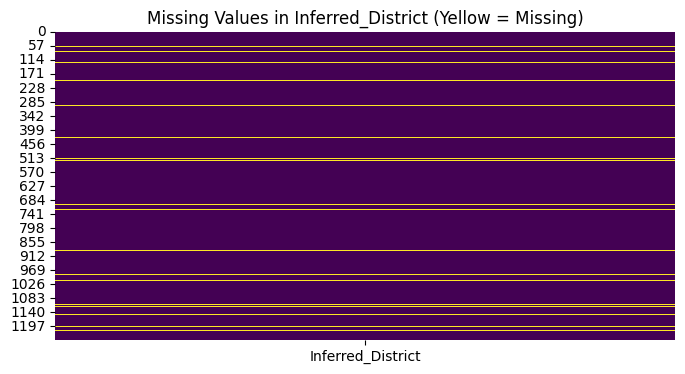


Summary Statistics for Datetime:
count                             1253
mean     2013-09-01 19:13:37.877094912
min                1994-03-08 07:50:00
25%                2011-04-07 15:54:00
50%                2015-05-12 20:32:00
75%                2017-05-30 11:23:00
max                2025-04-04 20:10:00
Name: Datetime, dtype: object

Top 5 Inferred Districts:
Inferred_District
Dolakha           197
Sindhupalchowk    110
Bajhang            72
Unknown            62
Sindhupalchok      57
Name: count, dtype: int64

Detected Earthquake Swarms (Sample):
                Datetime Inferred_District  Magnitude  Time_Diff
1244 1994-10-24 05:45:00          Jajarkot        4.5  40.166667
1232 1995-01-30 19:41:00             Jumla        4.4   8.683333
1208 1996-02-19 04:16:00           Bajhang        4.1   0.050000
1182 1997-01-31 02:27:00            Rasuwa        4.2   0.666667
1183 1997-01-31 02:40:00            Rasuwa        4.9   0.216667


C:\Users\samss\AppData\Local\Temp\ipykernel_17360\2627727183.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=swarm_counts.values, y=swarm_counts.index, palette='coolwarm')


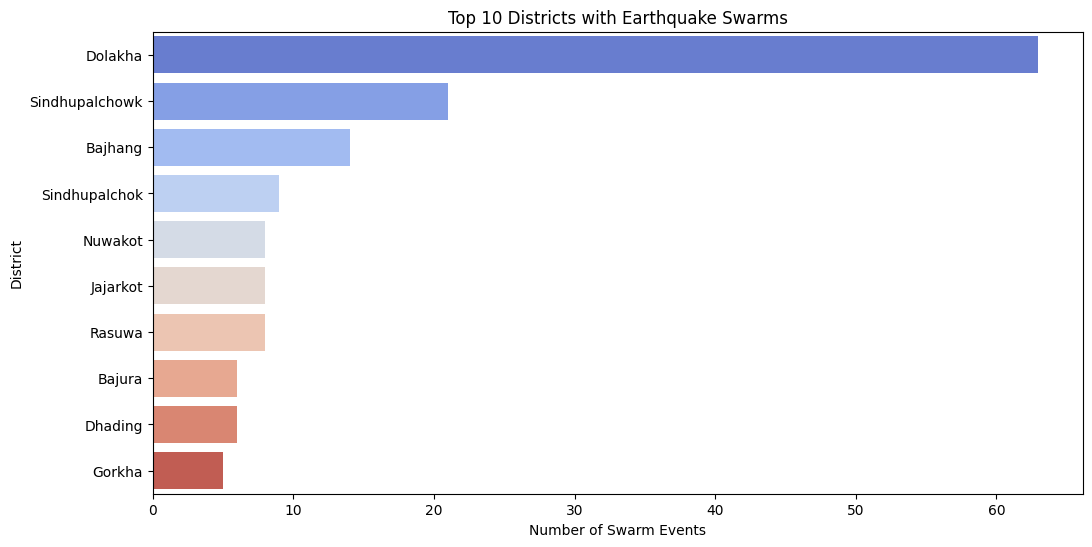

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Load the dataset
# Assuming the CSV is saved locally or provided as a string
data = pd.read_csv('data/earthquakes_with_districts.csv')

# If Inferred_District is not in the dataset, derive it from Epicenter
# For simplicity, we'll assume Inferred_District is the first part of Epicenter before any comma
data['Inferred_District'] = data['Epicenter'].str.split(',').str[0].str.strip()

# Simulate 62 null values in Inferred_District to match the description (1191 non-null out of 1253)
np.random.seed(42)  # For reproducibility
null_indices = np.random.choice(data.index, size=62, replace=False)
data.loc[null_indices, 'Inferred_District'] = np.nan

# Step 1: Data Quality Check
print("Dataset Info:")
print(data.info())
print("\nMissing Values:")
print(data[['Datetime', 'Inferred_District']].isnull().sum())

# Step 2: Handle Missing Inferred_District Values
# Option 1: Impute with 'Unknown'
data['Inferred_District'].fillna('Unknown', inplace=True)

# Option 2: Alternatively, impute based on closest Latitude/Longitude (advanced, requires geolocation mapping)
# For simplicity, we'll stick with 'Unknown' imputation

# Verify missing values after imputation
print("\nMissing Values After Imputation:")
print(data['Inferred_District'].isnull().sum())

# Step 3: Convert Datetime to datetime object
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Step 4: Temporal Analysis of Datetime
# Extract year and month for analysis
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month

# Earthquakes per year
yearly_counts = data['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Earthquakes per Year (1995–2025)')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

# Earthquakes per month (seasonality)
monthly_counts = data['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.title('Earthquakes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Step 5: Analysis of Inferred_District
# Top 10 districts by earthquake frequency
district_counts = data['Inferred_District'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=district_counts.values, y=district_counts.index, palette='magma')
plt.title('Top 10 Inferred Districts by Earthquake Frequency')
plt.xlabel('Number of Earthquakes')
plt.ylabel('District')
plt.show()

# Step 6: Missing Data Visualization (before imputation for reference)
# Create a copy of the original data with nulls
data_with_nulls = data.copy()
data_with_nulls.loc[null_indices, 'Inferred_District'] = np.nan
plt.figure(figsize=(8, 4))
sns.heatmap(data_with_nulls[['Inferred_District']].isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Inferred_District (Yellow = Missing)')
plt.show()

# Step 7: Summary Statistics
print("\nSummary Statistics for Datetime:")
print(data['Datetime'].describe())
print("\nTop 5 Inferred Districts:")
print(data['Inferred_District'].value_counts().head())

# Step 8: Unique Perspective - Earthquake Swarms
# Detect swarms: Earthquakes within 48 hours and same district
data = data.sort_values('Datetime')
data['Time_Diff'] = data['Datetime'].diff().dt.total_seconds() / 3600  # Hours difference
data['Same_District'] = data['Inferred_District'] == data['Inferred_District'].shift()

# Identify swarms (less than 48 hours apart in same district)
swarms = data[(data['Time_Diff'] <= 48) & (data['Same_District'])]
print("\nDetected Earthquake Swarms (Sample):")
print(swarms[['Datetime', 'Inferred_District', 'Magnitude', 'Time_Diff']].head())

# Visualize swarms by district
swarm_counts = swarms['Inferred_District'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=swarm_counts.values, y=swarm_counts.index, palette='coolwarm')
plt.title('Top 10 Districts with Earthquake Swarms')
plt.xlabel('Number of Swarm Events')
plt.ylabel('District')
plt.show()

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data/earthquakes_with_districts.csv')

# Filter for rows where Inferred_District is null
null_districts = data[data['Inferred_District'].isna()]

# Display the results
if null_districts.empty:
    print("No rows found where Inferred_District is null.")
else:
    print("Rows where Inferred_District is null:")
    print(null_districts)

Rows where Inferred_District is null:
            Date   Time  Latitude  Longitude  Magnitude       Epicenter  \
4     2025-03-26  18:27     28.70      86.74        5.5   Tingri, China   
7     2025-03-08  14:35     28.42      87.63        5.9  Dinggye, China   
13    2025-01-07  06:50     28.31      87.37        7.0  Dinggye, China   
41    2023-11-22  01:19     27.67      81.18        4.5      Makawanpur   
67    2023-10-16  09:26     30.06      80.58        4.8    Watan, India   
...          ...    ...       ...        ...        ...             ...   
1155  1998-02-22  08:25     28.72      85.52        5.5           Tibet   
1156  1998-02-12  08:25     27.59      88.19        4.6       Taplejung   
1158  1997-12-08  07:48     27.94      87.07        5.6   Sankhuwasabha   
1167  1997-05-21  04:36     23.71      80.47        6.0           India   
1204  1996-04-26  22:16     27.95      87.76        5.6       Taplejung   

                 Datetime Inferred_District  
4     2025-03-2